# __Data Visualization__

## __WHT Data__

### __1. Data preprocessing__

In [1]:
import glob, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Training files
files = glob.glob('../data/WHT_data/WHT_weather_set_parts_*')
files = sorted(files)
WHT_parts = [pd.read_csv(file_path) for file_path in files]

# Concatenate the DataFrames into a single training set
WHT_data = pd.concat(WHT_parts, ignore_index=True)

/tmp/ipykernel_4429/3604653322.py:6: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_4429/3604653322.py:6: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_4429/3604653322.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_4429/3604653322.py:6: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_4429/3604653322.py:6: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_pa

In [2]:
WHT_data['sampletime'] = pd.to_datetime(WHT_data['sampletime'])

# Extract year
WHT_data['year'] = WHT_data['sampletime'].dt.year

# Extract month
WHT_data['month'] = WHT_data['sampletime'].dt.month

# Extract day
WHT_data['day'] = WHT_data['sampletime'].dt.day

# Extract hour
WHT_data['hour'] = WHT_data['sampletime'].dt.hour

# Extract minute
WHT_data['minute'] = WHT_data['sampletime'].dt.minute

# Extract second
WHT_data['second'] = WHT_data['sampletime'].dt.second

# Drop the 'sampletime' column
WHT_data.drop(columns=['sampletime'], inplace=True)

# Constraining to data from 2023
#WHT_data = WHT_data[WHT_data.year >= 2023]

WHT_data.head()

,windspeed,airtemperature,relativehumidity,localwetness,localbattery,winddirection,airpressure,dewpoint,year,month,day,hour,minute,second
0,7.1742,9.3159,32.342,-0.025,11.995,NaN,NaN,NaN,2020,1,31,16,59,31
1,6.7829,9.322,32.324,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,37
2,7.0003,9.3159,32.36,-0.025,11.995,NaN,NaN,NaN,2020,1,31,16,59,43
3,7.2612,9.3159,32.434,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,49
4,6.9134,9.3159,32.489,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,55


In [3]:
# Convert the numeric values into float32
# We need to convert each category into float32
columns = WHT_data.columns

# There are some missing values with '\\N' in the variables. Let's transform into an arbitrary number
for ii in columns[1:]:
    WHT_data[ii][WHT_data[ii] == '\\N'] = -1
    # Converting into float32
    WHT_data[ii] = WHT_data[ii].astype('float32')

# Converting wind speed to numeric
WHT_data['windspeed'] = pd.to_numeric(WHT_data['windspeed'], errors='coerce')

# Now we can count the number of NaNs in each category
print(WHT_data.isna().sum())

/tmp/ipykernel_4429/3806321149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_4429/3806321149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_4429/3806321149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_4429/3806321149.py:7: SettingWithCopyWarning: 
A val

windspeed             15145
airtemperature            0
relativehumidity          0
localwetness        6334884
localbattery        6334884
winddirection       5557582
airpressure         5557582
dewpoint            5557582
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64


In [4]:
# Deleting the columns with more than 30% of NaNs

dim = len(WHT_data) # Dimension of the DataFrame

for ii in columns:
    nans = WHT_data[ii].isna().sum()*100/dim
    # Applying the condition over the column
    if nans > 30:
        WHT_data.drop(ii, axis=1, inplace=True)

# Deleting the remaining NaNs
WHT_data.dropna(inplace = True)

# Last, we display the type of each column
print(WHT_data.dtypes)

windspeed           float64
airtemperature      float32
relativehumidity    float32
year                float32
month               float32
day                 float32
hour                float32
minute              float32
second              float32
dtype: object


### __2. Resampling the data__

In [5]:
# Converting the types of time units into integers
# We dummify the year, day, month and hour so first we need to convert the variables into integers
cols_to_int = ['hour', 'day', 'month', 'year', 'minute', 'second']
WHT_data[cols_to_int] = WHT_data[cols_to_int].astype('int32')

In [6]:
# Reseting the index of the DataFrame and droping the column Index
WHT_data.reset_index(inplace=True); WHT_data.drop('index', axis=1, inplace=True)

In [7]:
# In order to make the data coincide with the seeing, we require to resample our data. For simplicity, we
# resample each 10 minutes. First, we need a new column to resample which will be 'datetime'
WHT_data['Datetime'] = pd.to_datetime(WHT_data[['year', 'month', 'day', 'hour', 'minute', 'second']])

# Converting the Datetime column into datetime format
WHT_data.Datetime = pd.to_datetime(WHT_data['Datetime'])

# Deleting the old columns
WHT_data.drop(['year','month','day','hour','minute','second'], axis=1, inplace=True)

# Displaying how the data looks like
WHT_data.head()

,windspeed,airtemperature,relativehumidity,Datetime
0,7.1742,9.3159,32.341999,2020-01-31 16:59:31
1,6.7829,9.3220,32.324001,2020-01-31 16:59:37
2,7.0003,9.3159,32.360001,2020-01-31 16:59:43
3,7.2612,9.3159,32.433998,2020-01-31 16:59:49
4,6.9134,9.3159,32.488998,2020-01-31 16:59:55


In [8]:
# Now we resample the DataFrame each 10 minutes (we take the columns Datetime for the resampling)
data_resample = WHT_data.resample('10T', on='Datetime').mean()

In [9]:
# Last, we recover the columns year, month, day, hour, minute, second from the Datetime column and we recover a regular index column
data_resample.reset_index(inplace = True);
data_resample.head()

,Datetime,windspeed,airtemperature,relativehumidity
0,2020-01-31 16:50:00,7.026400,9.317120,32.389801
1,2020-01-31 17:00:00,11.678404,9.164074,32.469090
2,2020-01-31 17:10:00,11.728677,8.956797,32.630127
3,2020-01-31 17:20:00,11.550176,8.911327,32.216049
4,2020-01-31 17:30:00,10.963666,8.726887,32.284809


In [10]:
# recovering each time column
data_resample['year']   = data_resample.Datetime.dt.year
data_resample['month']  = data_resample.Datetime.dt.month
data_resample['day']    = data_resample.Datetime.dt.day
data_resample['hour']   = data_resample.Datetime.dt.hour
data_resample['minute'] = data_resample.Datetime.dt.minute

# Deleting the Datetime column
data_resample.drop('Datetime', axis=1, inplace=True)

## __INT Data__

In [1]:
import glob, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Training files
files = glob.glob('../data/INT_data/INT_weather_set_parts_*')
files = sorted(files)
INT_parts = [pd.read_csv(file_path) for file_path in files]

# Concatenate the DataFrames into a single training set
INT_data = pd.concat(INT_parts, ignore_index=True)

/tmp/ipykernel_6746/97224268.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  INT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_6746/97224268.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  INT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_6746/97224268.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  INT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_6746/97224268.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  INT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_6746/97224268.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  INT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_

In [2]:
INT_data['sampletime'] = pd.to_datetime(INT_data['sampletime'])

# Extract year
INT_data['year'] = INT_data['sampletime'].dt.year

# Extract month
INT_data['month'] = INT_data['sampletime'].dt.month

# Extract day
INT_data['day'] = INT_data['sampletime'].dt.day

# Extract hour
INT_data['hour'] = INT_data['sampletime'].dt.hour

# Extract minute
INT_data['minute'] = INT_data['sampletime'].dt.minute

# Extract second
INT_data['second'] = INT_data['sampletime'].dt.second

# Drop the 'sampletime' column
INT_data.drop(columns=['sampletime'], inplace=True)

INT_data.head()

,localwindspeed,localairtemperature,localhumidity,localwetness,localbattery,year,month,day,hour,minute,second
0,35.653,4.7326,99.005,1.43,12.345,2020,6,6,9,59,59
1,23.479,4.7021,98.992,1.43,12.345,2020,6,6,10,0,5
2,35.784,4.6838,98.999,1.43,12.341,2020,6,6,10,0,11
3,28.74,4.6838,99.023,1.43,12.344,2020,6,6,10,0,17
4,28.436,4.6777,99.017,1.43,12.347,2020,6,6,10,0,23


In [3]:
# Convert the numeric values into float32
# We need to convert each category into float32
columns = INT_data.columns

# There are some missing values with '\\N' in the variables. Let's transform into an arbitrary number
for ii in columns[1:]:
    INT_data[ii][INT_data[ii] == '\\N'] = -1
    # Converting into float32
    INT_data[ii] = INT_data[ii].astype('float32')

# Converting wind speed to numeric
INT_data['localwindspeed'] = pd.to_numeric(INT_data['localwindspeed'], errors='coerce')

# Now we can count the number of NaNs in each category
print(INT_data.isna().sum())

/tmp/ipykernel_6746/2742543679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INT_data[ii][INT_data[ii] == '\\N'] = -1
/tmp/ipykernel_6746/2742543679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INT_data[ii][INT_data[ii] == '\\N'] = -1
/tmp/ipykernel_6746/2742543679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INT_data[ii][INT_data[ii] == '\\N'] = -1
/tmp/ipykernel_6746/2742543679.py:7: SettingWithCopyWarning: 
A val

localwindspeed         1210
localairtemperature       0
localhumidity             0
localwetness              0
localbattery              0
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64


#### Mean temperature, humidity and wind speed by month

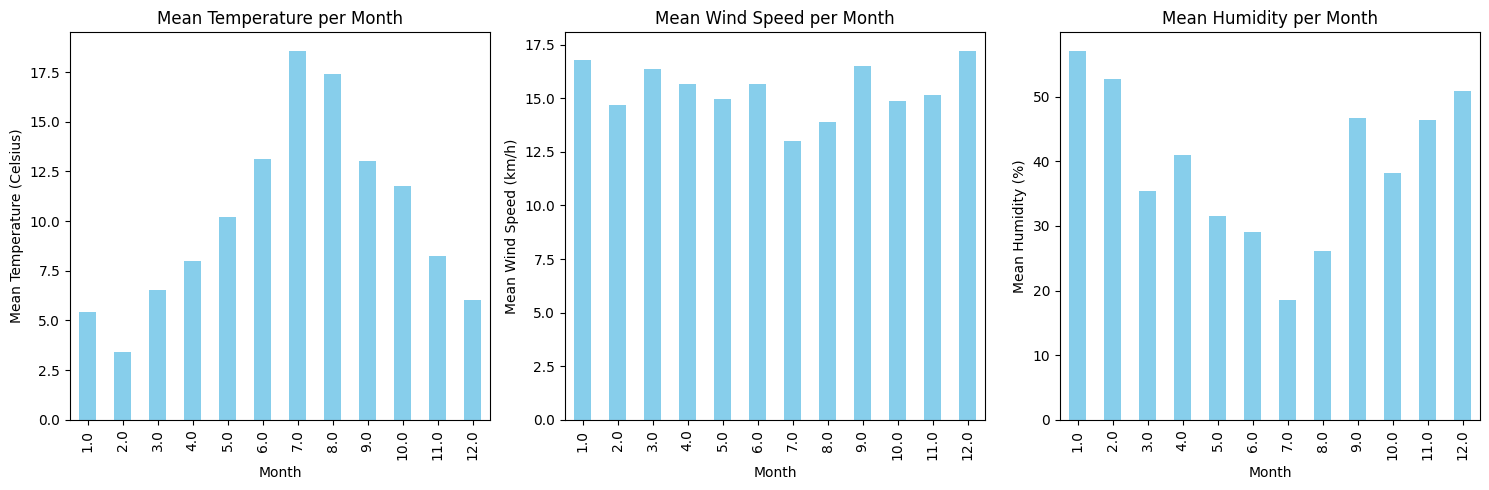

In [4]:
# Group by month and calculate mean temperature
mean_temp_per_month = INT_data.groupby('month')['localairtemperature'].mean()
mean_wind_per_month = INT_data.groupby('month')['localwindspeed'].mean()
mean_humi_per_month = INT_data.groupby('month')['localhumidity'].mean()

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.ravel()

# Plotting the mean temperature per month
mean_temp_per_month.plot(kind='bar', color='skyblue', ax=ax[0])
mean_wind_per_month.plot(kind='bar', color='skyblue', ax=ax[1])
mean_humi_per_month.plot(kind='bar', color='skyblue', ax=ax[2])

ax[0].set_title('Mean Temperature per Month'); ax[1].set_title('Mean Wind Speed per Month'); ax[2].set_title('Mean Humidity per Month')
ax[0].set_xlabel('Month'); ax[1].set_xlabel('Month'); ax[2].set_xlabel('Month')
ax[0].set_ylabel('Mean Temperature (Celsius)'); ax[1].set_ylabel('Mean Wind Speed (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Mean temperature, humidity and wind speed by year

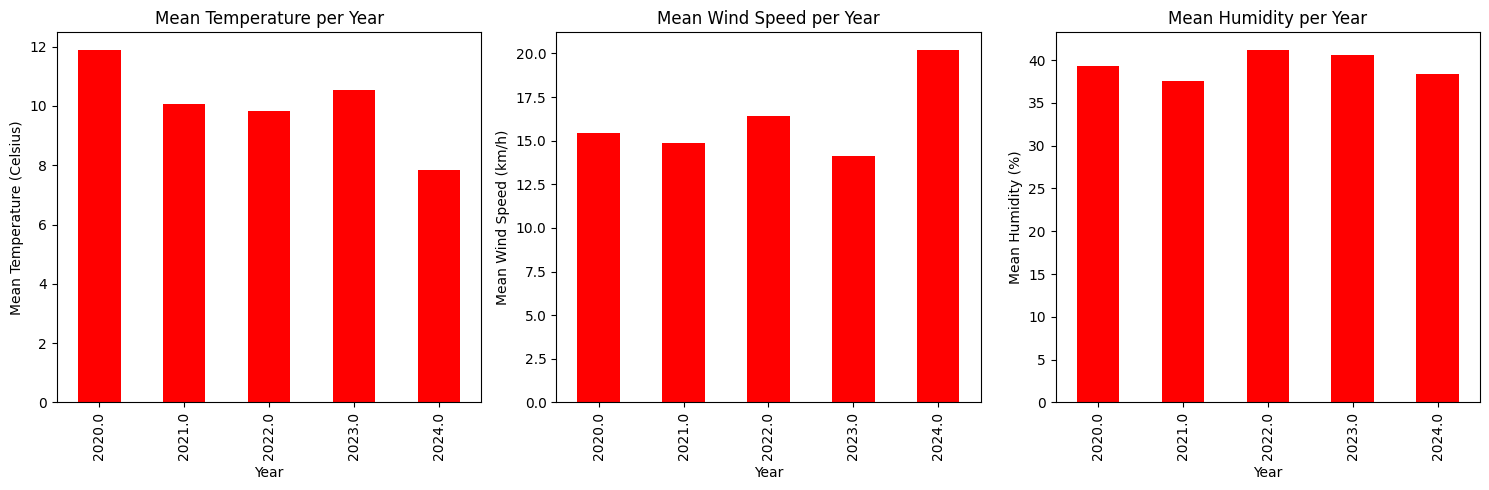

In [5]:
# Group by month and calculate mean temperature
mean_temp_per_year = INT_data.groupby('year')['localairtemperature'].mean()
mean_wind_per_year = INT_data.groupby('year')['localwindspeed'].mean()
mean_humi_per_year = INT_data.groupby('year')['localhumidity'].mean()

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.ravel()

# Plotting the mean temperature per month
mean_temp_per_year.plot(kind='bar', color='red', ax=ax[0])
mean_wind_per_year.plot(kind='bar', color='red', ax=ax[1])
mean_humi_per_year.plot(kind='bar', color='red', ax=ax[2])

ax[0].set_title('Mean Temperature per Year'); ax[1].set_title('Mean Wind Speed per Year'); ax[2].set_title('Mean Humidity per Year')
ax[0].set_xlabel('Year'); ax[1].set_xlabel('Year'); ax[2].set_xlabel('Year')
ax[0].set_ylabel('Mean Temperature (Celsius)'); ax[1].set_ylabel('Mean Wind Speed (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## __Seeing__

In [11]:
seeing = pd.read_csv('../data/seeing_data.csv')
seeing.head()

,Date,Time,Seeing
0,2020-01-01,00:00:32,1.5096
1,2020-01-01,00:01:08,1.5786
2,2020-01-01,00:01:44,1.2777
3,2020-01-01,00:02:20,1.2360
4,2020-01-01,00:02:55,1.3859


In [12]:
# Converting to datetime
seeing['Date'] = pd.to_datetime(seeing['Date'])
seeing['Time'] = pd.to_datetime(seeing['Time'])

# Extract year
seeing['year'] = seeing['Date'].dt.year

# Extract month
seeing['month'] = seeing['Date'].dt.month

# Extract day
seeing['day'] = seeing['Date'].dt.day

# Extract hour
seeing['hour'] = seeing['Time'].dt.hour

# Extract minute
seeing['minute'] = seeing['Time'].dt.minute

# Extract second
seeing['second'] = seeing['Time'].dt.second

# Drop the 'sampletime' column
seeing.drop(columns=['Date', 'Time'], inplace=True)

seeing.head()

/tmp/ipykernel_4429/1782678562.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  seeing['Time'] = pd.to_datetime(seeing['Time'])


,Seeing,year,month,day,hour,minute,second
0,1.5096,2020,1,1,0,0,32
1,1.5786,2020,1,1,0,1,8
2,1.2777,2020,1,1,0,1,44
3,1.2360,2020,1,1,0,2,20
4,1.3859,2020,1,1,0,2,55


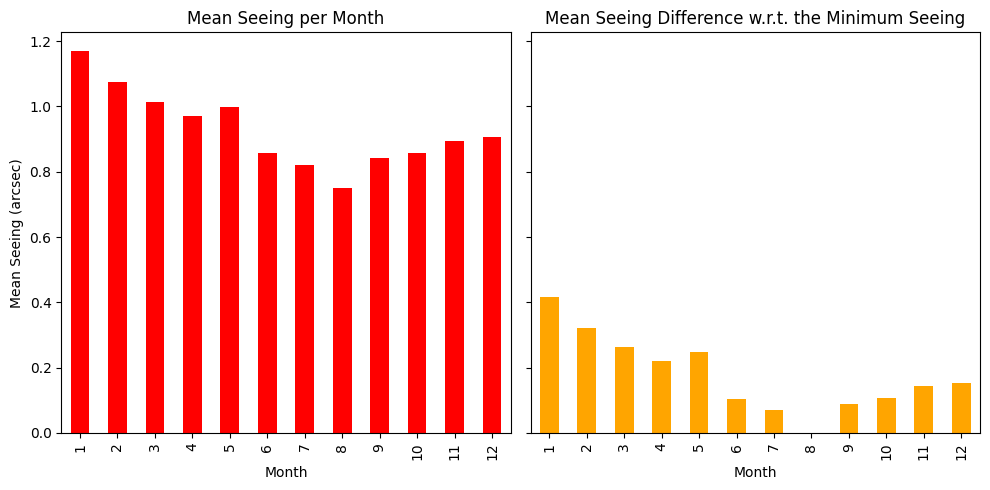

In [13]:
# Group by month and calculate mean temperature
mean_seeing_per_month = seeing.groupby('month')['Seeing'].mean()

fig, ax = plt.subplots(1,2,figsize=(10,5), sharey=True)
ax = ax.ravel()

# Plotting the mean temperature per month
mean_seeing_per_month.plot(kind='bar', color='red', ax=ax[0])
(mean_seeing_per_month - min(mean_seeing_per_month)).plot(kind='bar', color='orange', ax=ax[1])

ax[0].set_title('Mean Seeing per Month'); ax[1].set_title('Mean Seeing Difference w.r.t. the Minimum Seeing');
ax[0].set_xlabel('Month'); ax[1].set_xlabel('Month');
ax[0].set_ylabel('Mean Seeing (arcsec)'); #ax[1].set_ylabel('Mean Seeing (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
# Calculate the difference in seeing values per minute
seeing['seeing_diff'] = seeing['Seeing'].diff()

# Print the DataFrame to inspect the results
print(seeing)

# Calculate the mean absolute difference per minute
mean_diff_per_minute = seeing['seeing_diff'].abs().mean()

print("Mean absolute difference per minute:", mean_diff_per_minute)

        Seeing  year  month  day  hour  minute  second  seeing_diff
0       1.5096  2020      1    1     0       0      32          NaN
1       1.5786  2020      1    1     0       1       8       0.0690
2       1.2777  2020      1    1     0       1      44      -0.3009
3       1.2360  2020      1    1     0       2      20      -0.0417
4       1.3859  2020      1    1     0       2      55       0.1499
...        ...   ...    ...  ...   ...     ...     ...          ...
600839  1.2730  2024      2   20    23      57      17       0.0101
600840  0.9883  2024      2   20    23      57      52      -0.2847
600841  0.8413  2024      2   20    23      58      28      -0.1470
600842  0.8875  2024      2   20    23      59       3       0.0462
600843  0.9787  2024      2   20    23      59      39       0.0912

[600844 rows x 8 columns]
Mean absolute difference per minute: 0.1255427455327421


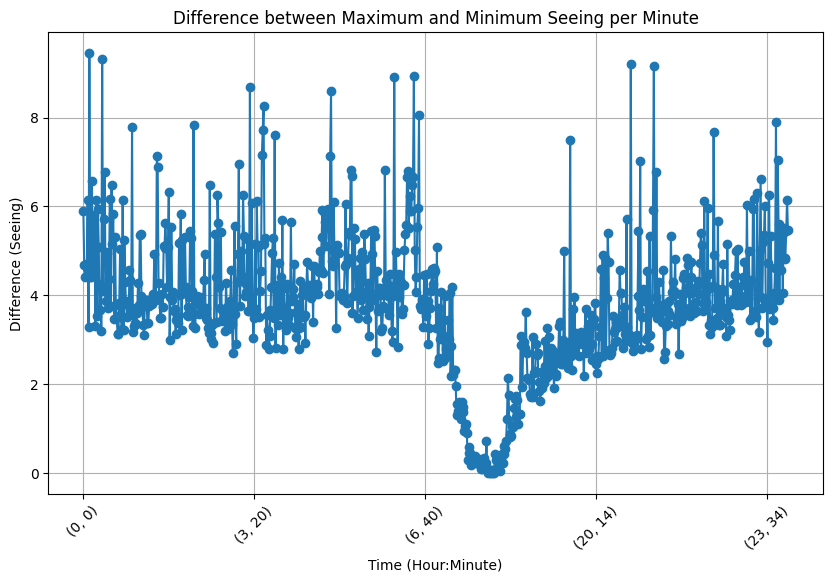

In [10]:
# Group by hour and minute and calculate the difference between max and min seeing values
minute_seeing_difference = seeing.groupby([seeing['hour'], seeing['minute']])['Seeing'].apply(lambda x: x.max() - x.min() )

# Plot the variation per minute
plt.figure(figsize=(10, 6))
minute_seeing_difference.plot(marker='o', linestyle='-')
plt.title('Difference between Maximum and Minimum Seeing per Minute')
plt.xlabel('Time (Hour:Minute)')
plt.ylabel('Difference (Seeing)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Combined data

In [15]:
# First, we create the Datetime column and resample the seeing for each 10 minutes
# Converting the Datetime column into datetime format
seeing['Datetime'] = pd.to_datetime(seeing[['year', 'month', 'day', 'hour', 'minute', 'second']])

# Converting the Datetime column into datetime format
seeing.Datetime = pd.to_datetime(seeing['Datetime'])

# Deleting the old columns
seeing.drop(['year','month','day','hour','minute','second'], axis=1, inplace=True)

# Displaying how the data looks like
seeing.head()

,Seeing,seeing_diff,Datetime
0,1.5096,NaN,2020-01-01 00:00:32
1,1.5786,0.0690,2020-01-01 00:01:08
2,1.2777,-0.3009,2020-01-01 00:01:44
3,1.2360,-0.0417,2020-01-01 00:02:20
4,1.3859,0.1499,2020-01-01 00:02:55


In [16]:
# Now we resample the DataFrame each 10 minutes (we take the columns Datetime for the resampling)
seeing_resample = seeing.resample('10T', on='Datetime').mean()

# Last, we recover the columns year, month, day, hour, minute, second from the Datetime column and we recover a regular index column
seeing_resample.reset_index(inplace = True);
seeing_resample.head()

# recovering each time column
seeing_resample['year']   = seeing_resample.Datetime.dt.year
seeing_resample['month']  = seeing_resample.Datetime.dt.month
seeing_resample['day']    = seeing_resample.Datetime.dt.day
seeing_resample['hour']   = seeing_resample.Datetime.dt.hour
seeing_resample['minute'] = seeing_resample.Datetime.dt.minute

# Deleting the Datetime column
seeing_resample.drop('Datetime', axis=1, inplace=True)

print(seeing_resample)

          Seeing  seeing_diff  year  month  day  hour  minute
0       1.377350    -0.001000  2020      1    1     0       0
1       1.547224     0.011547  2020      1    1     0      10
2       1.632365    -0.016829  2020      1    1     0      20
3       1.502673     0.007309  2020      1    1     0      30
4       1.406213    -0.014793  2020      1    1     0      40
...          ...          ...   ...    ...  ...   ...     ...
217723  1.070144    -0.050744  2024      2   20    23      10
217724  0.824625    -0.068075  2024      2   20    23      20
217725  1.038912     0.021606  2024      2   20    23      30
217726  1.038929    -0.010671  2024      2   20    23      40
217727  1.149365     0.002729  2024      2   20    23      50

[217728 rows x 7 columns]


In [17]:
# Right join on seeing
combined = pd.merge(data_resample, seeing_resample, on=['year', 'month', 'day', 'hour', 'minute'], how='right')

# Dropping NaNs
combined = combined.dropna()

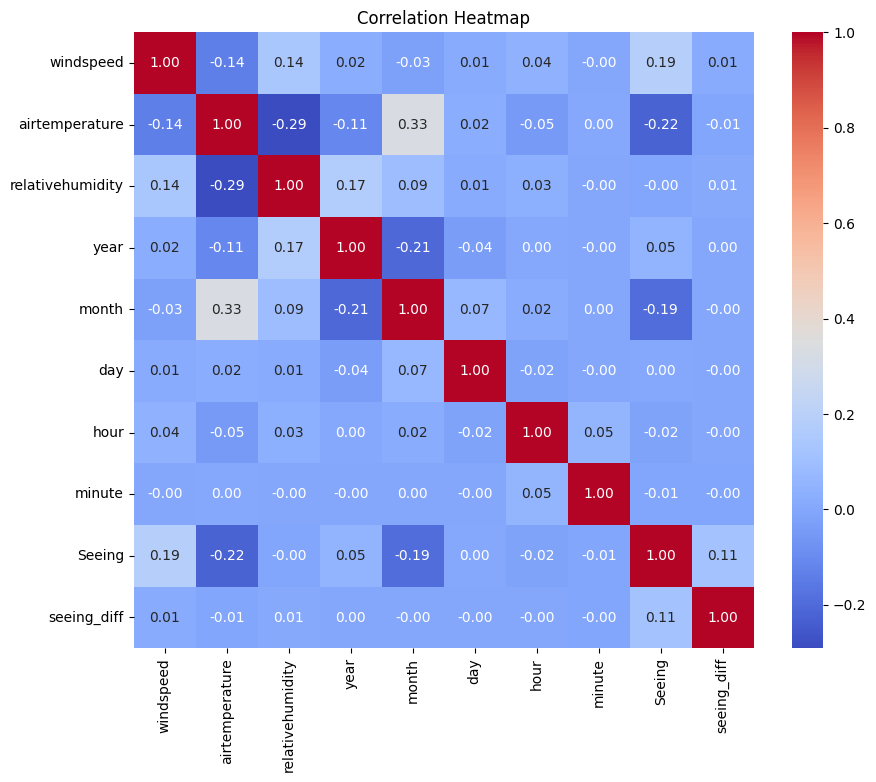

In [19]:
# Assuming combined is your DataFrame
correlation_matrix = combined.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

## __Preliminar machine learning models__

In [20]:
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
# We delete the column resulting from data engineering as it is redundant
df = combined.drop(columns=['seeing_diff'])

# We reset the index
df.reset_index(inplace=True)

In [22]:
df.drop('index', axis=1, inplace=True)

In [23]:
target = df.Seeing
data   = df.drop(columns='Seeing')

In [24]:
# We dummify the year, day, month and hour so first we need to convert the variables into integers
cols_to_int = ['hour', 'day', 'month', 'year', 'minute']

# Convert the columns into variable dummies
data = pd.get_dummies(data, columns=cols_to_int)

# Identificar las columnas de tipo bool
bool_cols = data.select_dtypes(include=['bool']).columns

# Convertir las columnas de tipo bool a int32
data[bool_cols] = data[bool_cols].astype('int32')

In [25]:
# Scaling numerical columns
cols_to_scale = ['windspeed', 'airtemperature', 'relativehumidity']

# Calling the MinMax scaler transformation
scaler = preprocessing.MinMaxScaler()

# Rescaling the columns
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state= 101)

### Random Forest Regressor

In [167]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=0, n_jobs=10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [168]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.1450714933701212
Mean Squared Error (MSE): 0.053407514639538314
R-squared (R2): 0.7462172347131596


### Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(X_train, y_train, X_test, y_test, degree):
    # Transformación polinómica de los conjuntos de entrenamiento y prueba
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Entrenamiento del modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Cálculo de las métricas
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return mae_train, mae_test, mse_train, mse_test, r2_train, r2_test

# Lista de grados del polinomio a probar
degrees = range(1, 8)  # Puedes ajustar este rango según lo desees

# Listas para almacenar las métricas
mse_train_list = []
mae_train_list = []
r2_train_list = []

for degree in degrees:
    # Llamada a la función para cada grado del polinomio
    mae_train, _, mse_train, _, r2_train, _ = polynomial_regression(X_train, y_train, X_test, y_test, degree)
    mse_train_list.append(mse_train)
    r2_train_list.append(r2_train)

# Graficar MSE
plt.plot(degrees, mse_train_list, label='MSE', marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE')
plt.title('MSE para distintos grados del polinomio')
plt.legend()
plt.show()

# Graficar MAE
plt.plot(degrees, mae_train_list, label='MAE', marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('MAE')
plt.title('MAE para distintos grados del polinomio')
plt.legend()
plt.show()

# Graficar R2
plt.plot(degrees, r2_train_list, label='R2', marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('R2')
plt.title('R2 para distintos grados del polinomio')
plt.legend()
plt.show()

### Dense Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Design the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Re-scaling also the target variable for performance imrpovements
# Crear y ajustar el MinMaxScaler para la variable objetivo
scaler_y = preprocessing.MinMaxScaler()

# Training set
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Train the model
history = model.fit(X_train, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test_scaled)
print("Mean Squared Error (MSE):", loss)
print("Mean Absolute Error (MAE):", mae)

Epoch 1/50
763/763 [==============================] - 2s 2ms/step - loss: 0.0038 - mae: 0.0426 - val_loss: 0.0031 - val_mae: 0.0389
Epoch 2/50
763/763 [==============================] - 1s 1ms/step - loss: 0.0026 - mae: 0.0350 - val_loss: 0.0028 - val_mae: 0.0399
Epoch 3/50
763/763 [==============================] - 1s 1ms/step - loss: 0.0020 - mae: 0.0305 - val_loss: 0.0021 - val_mae: 0.0319
Epoch 4/50
763/763 [==============================] - 1s 1ms/step - loss: 0.0015 - mae: 0.0272 - val_loss: 0.0019 - val_mae: 0.0298
Epoch 5/50
763/763 [==============================] - 1s 2ms/step - loss: 0.0013 - mae: 0.0252 - val_loss: 0.0018 - val_mae: 0.0296
Epoch 6/50
763/763 [==============================] - 1s 2ms/step - loss: 0.0011 - mae: 0.0235 - val_loss: 0.0017 - val_mae: 0.0273
Epoch 7/50
763/763 [==============================] - 1s 1ms/step - loss: 0.0011 - mae: 0.0226 - val_loss: 0.0015 - val_mae: 0.0250
Epoch 8/50
763/763 [==============================] - 1s 1ms/step - loss: 9.

239/239 [==============================] - 0s 761us/step
R-squared (R2): 0.7211080892694159


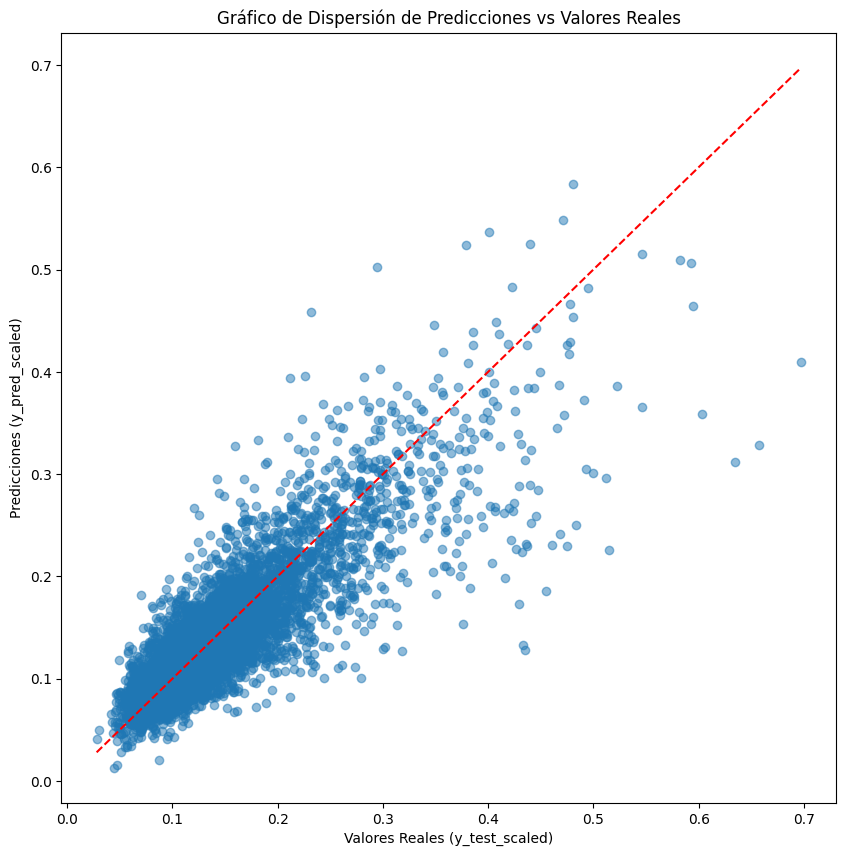

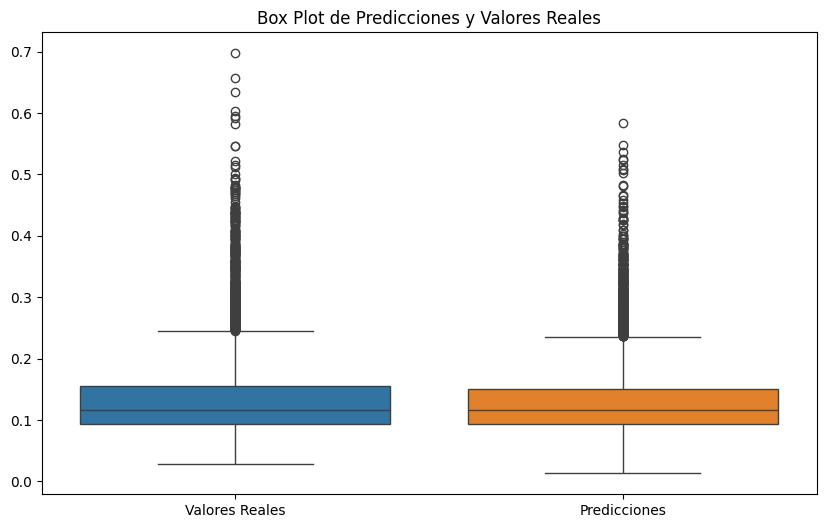

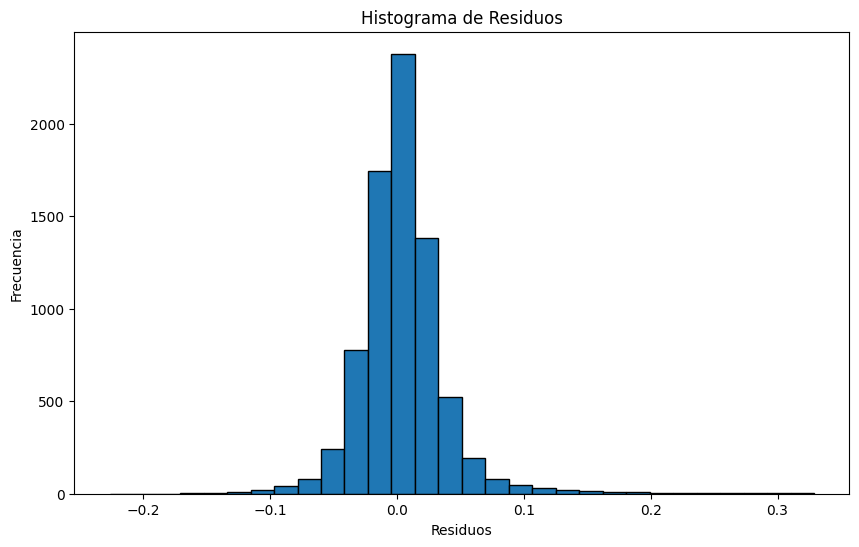

In [34]:
# Applying the DNN over the testing set
y_pred = model.predict(X_test)

# Calculate R-squared (R2)
r2 = r2_score(y_test_scaled, y_pred)
print("R-squared (R2):", r2)

# Gráfico de dispersión
plt.figure(figsize=(10,10))
plt.scatter(y_test_scaled, y_pred, alpha=0.5)
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', linestyle='--')
plt.xlabel('Valores Reales (y_test_scaled)')
plt.ylabel('Predicciones (y_pred_scaled)')
plt.title('Gráfico de Dispersión de Predicciones vs Valores Reales')
plt.show()

# Boxplot de datos predecidos vs datos reales
import seaborn as sns

# Crear un DataFrame para las comparaciones
df_comparacion = pd.DataFrame({
    'Valores Reales': y_test_scaled.flatten(),
    'Predicciones': y_pred.flatten()
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_comparacion)
plt.title('Box Plot de Predicciones y Valores Reales')
plt.show()

residuos = y_test_scaled - y_pred

# Histograma de residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()